## Data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.linspace(0, 10, 101)
x_train

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
y_train = 10 + 2*x_train + np.random.normal(0, 1, 101)
y_train

array([10.93689547,  9.70139343, 11.61302562, 11.45649387,  9.21425283,
       10.72148741, 11.43041305, 11.51632265, 11.73911906, 13.25762271,
       12.12325343, 10.64576157, 12.14141102, 10.07855958, 10.31179089,
       12.13621   , 11.20746921, 13.47881383, 13.22810229, 13.51807803,
       13.9880078 , 14.39785959, 13.7683653 , 15.08813809, 14.70119082,
       13.89270256, 14.54814445, 15.58773504, 15.49566041, 17.15570483,
       16.24550632, 18.78766965, 17.27697025, 15.88730137, 17.07890181,
       18.57671185, 15.87541126, 16.81220158, 16.82564782, 17.52600921,
       16.9940618 , 18.57565435, 16.54512391, 18.94386824, 18.77642887,
       16.96162844, 18.49022447, 19.42884272, 19.00945138, 18.73350474,
       18.83692526, 19.75646528, 19.03855761, 20.71559541, 21.45707509,
       19.19823885, 19.78630791, 22.10366172, 19.99336621, 21.28831211,
       22.53281437, 20.53769566, 23.53696341, 23.39504328, 21.33787637,
       22.08637815, 24.50407627, 22.03155097, 23.11328251, 24.88

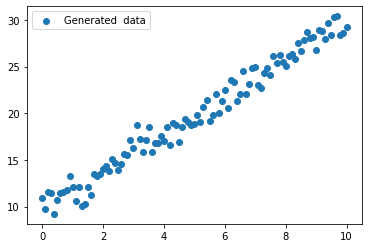

In [ ]:
plt.scatter(x_train, y_train, label='Generated  data')
plt.legend()
plt.show()

## Parameters' Initialization

In [ ]:
# just start with some numbers
w0 = tf.Variable(25.)
w1 = tf.Variable(-1.)

In [ ]:
# prediction for given w0 & w1
def h(x):
   y = w1*x + w0
   return y

In [ ]:
# loss function = mean squared error
def mse(y_pred, y_true):
   return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# loss for initial parameters
y_pred = h(x_train)
mse(y_pred, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=78.33857>

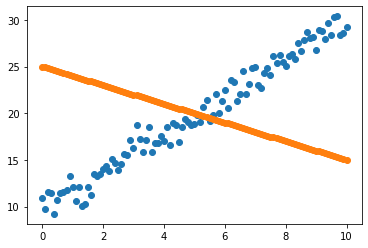

In [ ]:
# prediction for initial parameters
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred);

## Parameters Search

In [ ]:
# number of loops through all your data to update the parameters
training_epochs = 500

# relative length of the step
learning_rate = 0.02

for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(x_train)
        loss = mse(y_predicted, y_train)
        if epoch % 20 == 0: 
          print(f'Epoch: {epoch}, loss: {loss}')

    # get gradients
    gradients = tape.gradient(loss, [w0, w1])

    # adjust weights - do the step 
    w1.assign_sub(gradients[1]*learning_rate)
    w0.assign_sub(gradients[0]*learning_rate)

Epoch: 0, loss: 78.33856964111328
Epoch: 20, loss: 41.40727996826172
Epoch: 40, loss: 28.102066040039062
Epoch: 60, loss: 19.174776077270508
Epoch: 80, loss: 13.18492317199707
Epoch: 100, loss: 9.165961265563965
Epoch: 120, loss: 6.46937894821167
Epoch: 140, loss: 4.660078048706055
Epoch: 160, loss: 3.446106195449829
Epoch: 180, loss: 2.631579637527466
Epoch: 200, loss: 2.0850601196289062
Epoch: 220, loss: 1.7183679342269897
Epoch: 240, loss: 1.472329020500183
Epoch: 260, loss: 1.3072469234466553
Epoch: 280, loss: 1.1964839696884155
Epoch: 300, loss: 1.1221656799316406
Epoch: 320, loss: 1.0723001956939697
Epoch: 340, loss: 1.038843035697937
Epoch: 360, loss: 1.016394853591919
Epoch: 380, loss: 1.0013327598571777
Epoch: 400, loss: 0.991226851940155
Epoch: 420, loss: 0.9844456911087036
Epoch: 440, loss: 0.9798961877822876
Epoch: 460, loss: 0.9768436551094055
Epoch: 480, loss: 0.9747949242591858


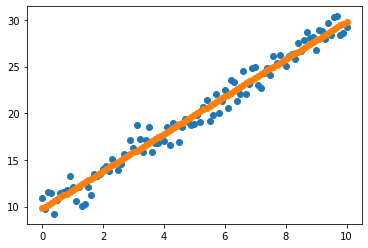

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,h(x_train));

## Animation

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
w0 = tf.Variable(25.)
w1 = tf.Variable(-1.)

fig = plt.figure()
plt.scatter(x_train, y_train, c='blue')
line, = plt.plot(x_train, h(x_train), c='orange')
plt.close()

def animate(i):
    with tf.GradientTape() as tape:
        y_predicted = h(x_train)
        loss = mse(y_predicted, y_train)

    # get gradients
    gradients = tape.gradient(loss, [w0, w1])

    # adjust weights - do the step 
    w1.assign_sub(gradients[1]*learning_rate)
    w0.assign_sub(gradients[0]*learning_rate)

    line.set_ydata(h(x_train))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 500), interval=50)